# Week 1: Studying Fundamental Processes in Accretion and Solving Differential Equations Numerically

# **Task 01**
**Apply the Finite Difference Method and Euler Method to solve ODEs; e.g : motion of a projectile under gravity**

The method predicts the next value of y in an iteration using the Forward Finite Difference method.

Condition used to approximate is:
$$
y_{n+1} = y_n + h * f(t_n, y_n)
$$
where f(t, y) is $ \frac{dy}{dt} $



*Resource:* http://geeksforgeeks.org/dsa/euler-method-solving-differential-equation/

# Projectile Motion Using Euler Method

---

## Question

A particle is projected from the origin with an initial speed $u$ at an angle $\theta$ with the horizontal. The motion takes place under uniform gravitational acceleration $g$ acting vertically downward. Air resistance is neglected.

1. Write the equations of motion as a system of first-order differential equations.
2. Using the **Euler method**, numerically compute the trajectory of the projectile.
3. Plot the numerical trajectory of the projectile in the $x$–$y$ plane.
4. From the numerical results, estimate:
   - Time of flight  
   - Maximum height  
   - Horizontal range  

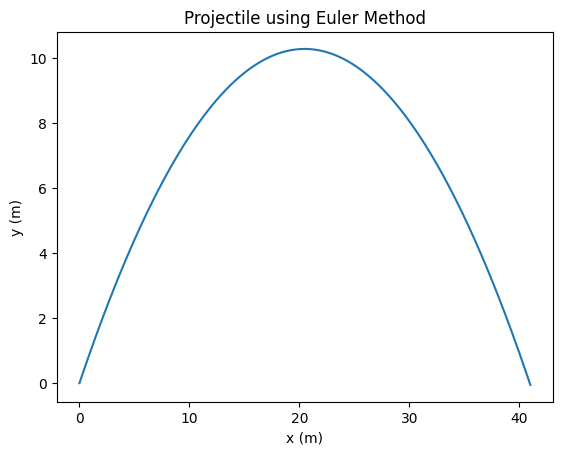

Time of flight (s): 2.899999999999982
Maximum height (m): 10.27489665440983
Horizontal range (m): 41.01219330881969


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Initial conditions and Parameters

u = 20
theta = np.deg2rad(45)
g = 9.8
h = 0.01
x, y, t = 0, 0, 0
vx = u * np.cos(theta)
vy = u * np.sin(theta)

# Eulers Method
x_list = [x]
y_list = [y]
t_list = [t]

## y(n+1) = y(n) + h * f(tn, yn)

while y >= 0:
  x = x + h * vx
  y = y + h * vy
  vx = vx
  vy = vy - h * g
  t = t + h

  x_list.append(x)
  y_list.append(y)
  t_list.append(t)

# Plotting trajectory

plt.plot(x_list, y_list)
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.title("Projectile using Euler Method")
plt.show()

# Results

time_of_flight = t_list[-1]
maximum_height = max(y_list)
horizontal_range = x_list[-1]

print("Time of flight (s):", time_of_flight)
print("Maximum height (m):", maximum_height)
print("Horizontal range (m):", horizontal_range)

# Motion of a Charged Particle in Crossed Electric and Magnetic Fields  
## (Euler Method)

---

## Question

A particle of charge $q$ and mass $m$ moves in the $x$–$y$ plane under the influence of a uniform electric field

$$
\mathbf{E} = E_0\,\hat{x}
$$

and a uniform magnetic field

$$
\mathbf{B} = B_0\,\hat{z}
$$

which is perpendicular to the plane of motion.

At time $t = 0$, the particle is at the origin with initial velocity

$$
\mathbf{v}(0) = v_{x0}\,\hat{x} + v_{y0}\,\hat{y}.
$$

---

### Tasks

1. Write the equations of motion as a system of first-order differential equations using the Lorentz force law.
2. Using the **Euler method**, numerically compute the trajectory of the charged particle in the $x$–$y$ plane.
3. Plot the numerical trajectory of the particle.

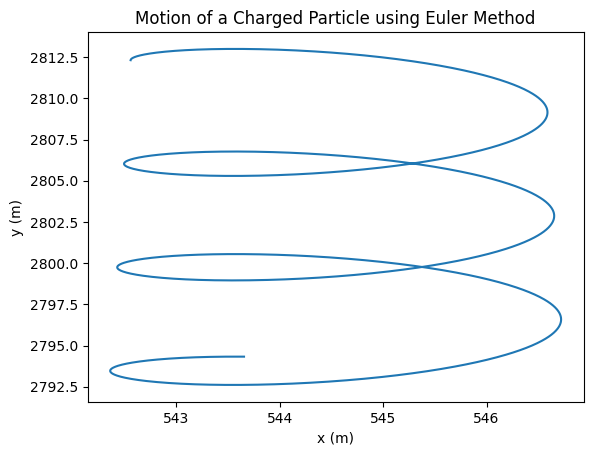

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Initial conditions and Parameters

vx, vy = 0, 1
t = 0
q, m = 1, 1
E = 1  # x - dir
B = 1 # z-direction
h = 0.01

# Euler Method

x_list = []
y_list = []
t_list = []

t_final = 20   # Simulation ends at this time

while t <= t_final:
  ax = (q/m) * (E + vy * B)
  ay = (q/m)*(-vx*B)

  x = x + h * vx
  y = y + h*vy
  vx = vx + h*ax
  vy = vy + h*ay

  t = t + h

  x_list.append(x)
  y_list.append(y)
  t_list.append(t)

# Plotting trajectory

plt.plot(x_list, y_list)
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.title("Motion of a Charged Particle using Euler Method")
plt.show()

# **Task 02**
**Solve the Diffusion Equation in Python; e.g : start from a central density with reflective/absorbing walls and evolve over time**

*Resource:* https://share.google/QoGBRF4gfjejR582X

The diffusion equation is:
$$
\frac {\partial u}{\partial t} = \nabla .(D(u(r,t),r)  \nabla u(r,t))
\tag{2.1}
$$
where, D denotes the *diffusion coefficient* at a particular density *u* and position **r**.

If this diffusion coefficient does not depend on density and location of particles, i.e., is constant, then the above equation becomes:
(in 1-D)
$$
\frac {\partial u}{\partial t} = D \frac {d^2 u}{dx^2}
\tag{2.2}
$$
This equation is known *heat equation*.

# **Diffusion Equation in 1-D**

Consider equation 2.2 on an interval *x $\in$ [0,L]* with initial condition (t = 0):
$$
u(x,0) = f(x) \quad \forall \:x \in [0,L] \tag{2.3}
$$
and Dirichlet boundary conditions:
$$
u(0,t) = 0 = u(L,t) \quad \forall \: t  \tag{2.4}
$$
### **Analytic Solution**

$$
u(x,t) = \sum_{n=1}^{\infty} A_n sin(kx)exp(-Dk^2t) \\
A_n = F_n = \frac {2}{L} \int_{0}^{L} f(\xi)sin(\frac{\pi n}{L} \xi)d \xi
$$

### **The FTCS Explicit Method**

FCTS means *forward in time, central in space*. Now writing 7.2 in a numerical fashion using the analogy:
$$
u_i = i \Delta x \\
u^j = j \Delta t \\
\frac {u_{i}^{j+1} - u_{i}^{j}}{\Delta t} = D \frac{u_{i+1}^{j}-2u_{i}^{j}+u_{i-1}^{j}}{\Delta x^2}
$$
The future value or $u(x, t+ \Delta t)$, while replacing $\alpha = D \frac{\Delta t}{\Delta x^2}$ , is:
$$
u_{i}^{j+1} = (1-2 \alpha)u_{i}^{j} + \alpha (u_{i+1}^{j}+u_{i-1}^{j})
$$
Using von Neumann (Fourier) stability analysis, i.e, $u_{i}^{j} = g^{i \omega t_j} e^{ikx_i}$, (g = amplification factor):
$$
g^2 = (1- 2\alpha)g + 2g\alpha cos(k\Delta x) \\
\implies g(k) = 1 - 4 \alpha sin^2(\frac{k\Delta x}{2})
$$
Since $|g(k)| < 1$ for stability,
$$
\alpha \le \frac{1}{2} \\
\Delta t \le \frac{1}{2} \frac{\Delta x^2}{D}
$$

### * For Reflective Walls

*{i = 1, 2,...,M-1}*

1. **Left boundary** $ x = 0$
$$
\left.\frac{\partial u}{\partial x}\right|_{x=0} = 0 \qquad \implies u_{1}^{j} = u_{-1}^{j}
$$

    This gives :
$$
u_{0}^{j+1} =u_{0}^{j} + 2 \alpha (u_{1}^{j} - u_{0}^{j})
$$

2. **Right Boundary** $x = L$
$$
\left. \frac{\partial u}{\partial x}\right |_{L} = 0 \qquad \implies u_{M-1}^{j} = u_{M+1}^{j}
$$
    This gives
$$
u_{M}^{j+1} =u_{M}^{j} + 2 \alpha (u_{M-1}^{j} - u_{M}^{j})
$$

### **Example 1**

Use the FTCS explicit method to solve the one-dimensional heat equation

$$
u_t = u_{xx}
$$

on the interval

$$
x \in [0, L],
$$

with the initial heat distribution

$$
u(x,0) = f(x),
$$

and boundary conditions

$$
u(0,t) = T_l, \qquad u(L,t) = T_r.
$$

Other parameters are chosen according to the table below.

---

#### Given Parameters

- Space interval:  
  $$
  L = 1
  $$

- Amount of space points:  
  $$
  M = 10
  $$

- Amount of time steps:  
  $$
  T = 30
  $$

- Boundary conditions:  
  $$
  T_l = T_r = 0
  $$

- Initial heat distribution:  
  $$
  f(x) = 4x(1 - x)
  $$

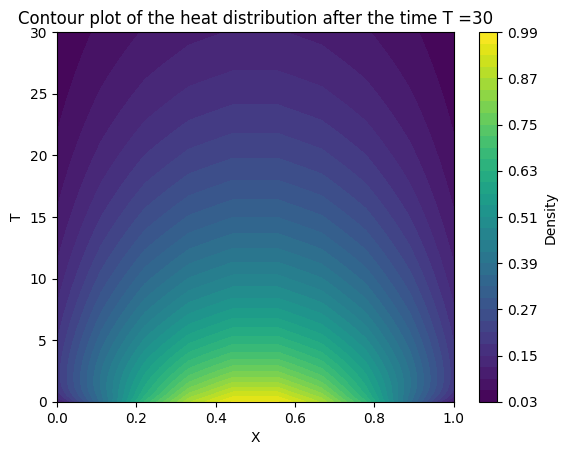

In [1]:
import numpy as np
import matplotlib.pyplot as plt

l = 1
m = 10
f = lambda x : 4*x*(1-x)

X = np.linspace(0,1,10)
T = np.linspace(0,30,100)
delta_t, delta_x = T[1] - T[0], X[1]- X[0]
alpha = 0.01* delta_t / (delta_x)**2

u0 = [f(x) for x in X]
u = [u0]

for j in T:
  uj = [0] + u[-1] +[0]
  uj1 = u[-1] + [0,0]
  uj2 = [0,0] + u[-1]
  ut = (1-2*alpha) * np.array(uj) + alpha * (np.array(uj1) + np.array(uj2))
  ut = list(ut)
  ut.pop(0)
  ut.pop(-1)
  u.append(ut)

u.pop(0)
u = np.array(u)

x, t = np.meshgrid(X, T)

plt.contourf(x, t, u, levels = 30)
plt.colorbar(label="Density")
plt.xlabel("X")
plt.ylabel("T")
plt.title("Contour plot of the heat distribution after the time T =30")
plt.show()


### **Example 2**

### Numerical Solution of the 1D Diffusion Equation and Contour Plot

## Problem

Consider the one–dimensional diffusion equation

$$
\frac{\partial u}{\partial t}
=
D\frac{\partial^2 u}{\partial x^2},
$$

defined on the domain

$$
0 \le x \le L.
$$

---

### Initial Condition

At time $t = 0$, the concentration is localized at the center of the domain:

$$
u(x,0)
=
\exp\left[
-\frac{(x-\tfrac{L}{2})^2}{\sigma^2}
\right],
$$

where $\sigma$ controls the width of the initial distribution.

---

### Boundary Conditions
Solve for **Absorbing (Dirichlet) boundaries**:

$$
u(0,t) = 0,
\qquad
u(L,t) = 0
$$

---

### Tasks

1. Discretize the diffusion equation using the **FTCS finite difference method**.
2. Implement the numerical scheme in **Python**.
3. Evolve the solution up to a specified final time $t = T$.
4. Plot a **space–time contour plot** of $u(x,t)$.

---

### Numerical Parameters
$$
L = 1.0 \\
D = 0.1 \\
Δx = 0.02 \\
Δt = 0.001 \\
T = 0.2  \\
σ = 0.05  \\
$$

## **Absorbing Walls**

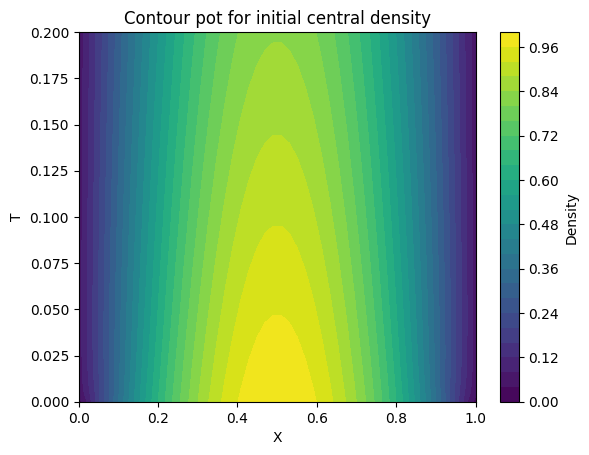

In [30]:
import numpy as np
import matplotlib.pyplot as plt

L = 1
m = 10
D = 0.1
delta_x = 0.02
delta_t = 0.001
t_final = 0.2
sigma = 0.05
func = lambda x : np.exp(-(x - L/2)**2 / sigma**2)

X = np.linspace(0, L, int(L / delta_x))
T = np.linspace(0, t_final, int(t_final / delta_t))
alpha = D* delta_t / (delta_x)**2

u0 = [f(x) for x in X]
u = [u0]

for j in T:
  uj = [0] + u[-1] +[0]
  uj1 = u[-1] + [0,0]
  uj2 = [0,0] + u[-1]
  ut = (1-2*alpha) * np.array(uj) + alpha * (np.array(uj1) + np.array(uj2))
  ut = list(ut)
  ut.pop(0)
  ut.pop(-1)
  u.append(ut)

u.pop(0)
u = np.array(u)

x, t = np.meshgrid(X, T)

plt.contourf(x, t, u, levels = 30)
plt.colorbar(label="Density")
plt.xlabel("X")
plt.ylabel("T")
plt.title("Contour pot for initial central density")
plt.show()